In [1]:
# Running-mean filter

1) Starting by creating a pure, noiseless signal, and that's defined according to given equation

I am not writing equation here

2) ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

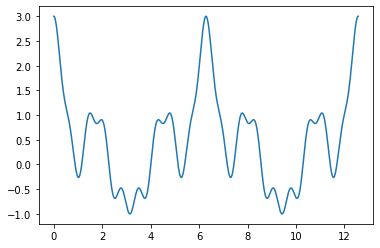

In [6]:
N = 10001

time = np.linspace(0, 4*np.pi, N)

signal = np.zeros(N)

for j in range(1,4):
    signal += np.cos(j*time)**j    # Here is the original signal function

plt.plot(time, signal)

# Here is the original signal plot

plt.show()

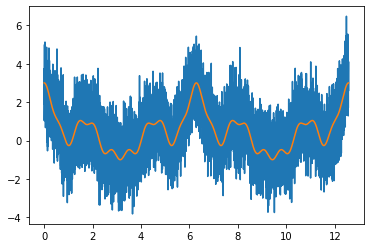

In [29]:
# Noisy signal

N = 10001

time = np.linspace(0, 4*np.pi, N)

signal = np.zeros(N)

for j in range(1,4):
    signal += np.cos(j*time)**j    # Here is the original signal function

noisysignal = signal + np.random.randn(N)
# plt.plot(time, signal, time, noisysignal) #with this line code we cannot see original signal

# But with this line code

plt.plot(time, noisysignal, time, signal)

# Here is the original signal plot

plt.show()

In [30]:
# Implement the mean smoothing filter, also called the running mean filter

In [31]:
# becouse of we keep noisy signal, filtered signal copied from noisy signal

In [32]:
# filteredsignal = noisysignal is problematic variable assigning

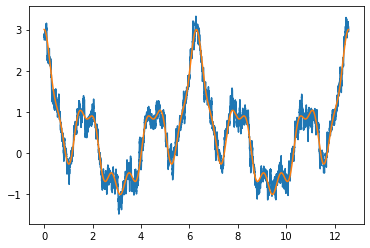

In [33]:
# let's see the problem

# filteredsignal = noisysignal # falsy assignment, just giving different name
 
k = 15

# for t in range(N):
#     filteredsignal[t] = np.mean( noisysignal[t-k:t+k] )
#                                             negative :   

for t in range(N):
    lower_bound = np.max((0,t-k))
    upper_bound = np.min((N, t+k))
    filteredsignal[t] = np.mean( noisysignal[lower_bound:upper_bound])
    
plt.plot(time, filteredsignal, time, signal)

plt.show()

In [34]:
# Considering to above graph noisy signal is not noisy any more becouse of the false variable
# assignment

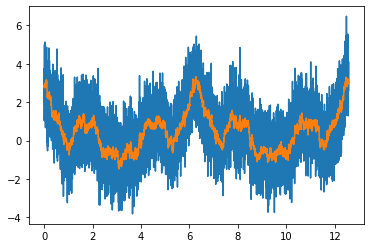

In [37]:
import copy

filteredsignal = copy.deepcopy(noisysignal)
 
k = 15

# for t in range(N):
#     filteredsignal[t] = np.mean( noisysignal[t-k:t+k] )
#                                             negative :   

for t in range(N):
    lower_bound = np.max((0,t-k))
    upper_bound = np.min((N, t+k))
    filteredsignal[t] = np.mean( noisysignal[lower_bound:upper_bound])
    
plt.plot(time, noisysignal, time, filteredsignal)

plt.show()

In [38]:
def meansmooth(signalIn,k):
    filteredsignal = copy.deepcopy(signalIn)
 

    for t in range(N):
        
        filteredsignal[t] = np.mean( noisysignal[np.max((0, t-k)):np.min((N,t+k))])
        
    return filteredsignal    

In [39]:
# Now we want to create that plot showing the correlation between the filtered signal and the original
# noisless signal as a function of the parameters of k

In [41]:
k_values = np.arange(5,41)

signalCorrelation = []

for ki in k_values:
    
    #  filter the signal
    fsig = meansmooth(noisysignal, ki)
    
    # compute the correlation signal and original one
    signalCorrelation.append( np.corrcoef(fsig, signal)[0,1] )    

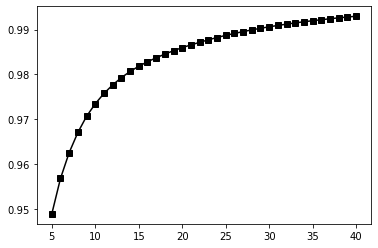

In [44]:
plt.plot(k_values, signalCorrelation, 'ks-')
plt.show()

# Smoothing via Gaussian Convolution Filtering Method

In [2]:
# create signal
srate = 512 # sampling rate
time = np.arange(-2,2,1/srate)
time

array([-2.        , -1.99804688, -1.99609375, ...,  1.99414062,
        1.99609375,  1.99804688])

In [5]:
# pay attention, last step is not 2, so:
time = np.arange(-2,2+1/srate,1/srate)

In [6]:
time

array([-2.        , -1.99804688, -1.99609375, ...,  1.99609375,
        1.99804688,  2.        ])

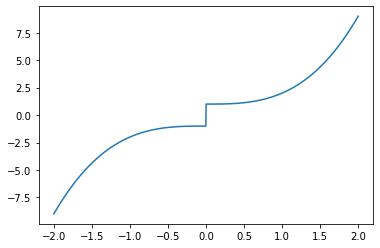

In [8]:
points = len(time)      #how many time points

signal = time**3 + np.sign(time)

plt.plot(time, signal)
plt.show()

In [9]:
from scipy.signal import detrend

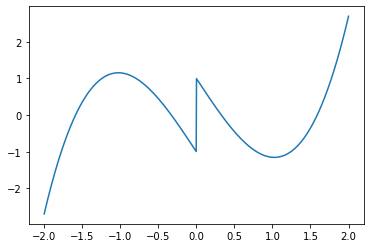

In [10]:
srate = 512 # sampling rate
time = np.arange(-2,2+1/srate,1/srate)
points = len(time)      #how many time points

signal = detrend(time**3 + np.sign(time))    # detrend is contained inside scipy, is going to remove the trend line from a time series

plt.plot(time, signal)
plt.show()

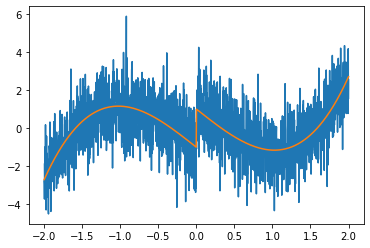

In [12]:
srate = 512 # sampling rate
time = np.arange(-2,2+1/srate,1/srate)
points = len(time)      #how many time points

signal = detrend(time**3 + np.sign(time))    # detrend is contained inside scipy, is going to remove the trend line from a time series
noisysignal = signal + np.random.randn(points)*1.1

plt.plot(time, noisysignal,time, signal)
plt.show()

Text(0.5, 1.0, 'n=21, s=0.005')

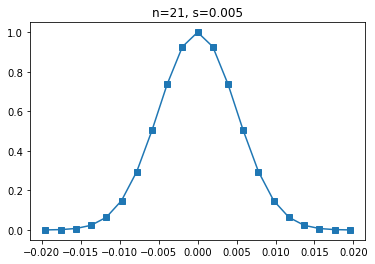

In [15]:
# create the Gaussian

# for getting 21 pomits in our signal k =

k =10

x = np.arange(-k, k+1)/srate
sigma = .005

gkern = np.exp( -x**2 / (2*sigma**2) )    #convolutional operator, kernel

plt.plot(x, gkern, 's-')
plt.title('n=%s, s=%g'%(2*k+1,sigma))





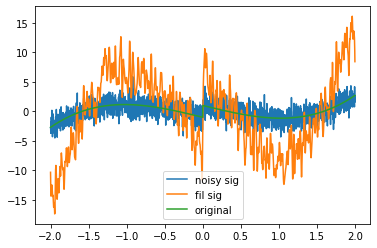

In [20]:
filtsig = np.convolve(noisysignal, gkern, mode='same') #same comes from the same dimension matricies, noisysignal and gkren

plt.plot(time, noisysignal, time, filtsig, time, signal)
plt.legend( ['noisy sig','fil sig', 'original'] ,  )
plt.show()


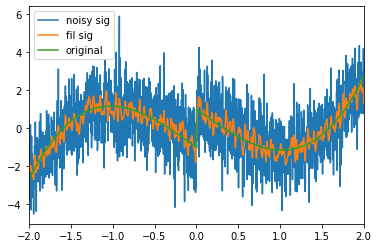

In [23]:
gkern /= sum(gkern)
filtsig = np.convolve(noisysignal, gkern, mode='same') #same comes from the same dimension matricies, noisysignal and gkren

plt.plot(time, noisysignal, time, filtsig, time, signal)
plt.legend( ['noisy sig','fil sig', 'original'] ,  )
plt.xlim(time[[0,-1]])
plt.show()

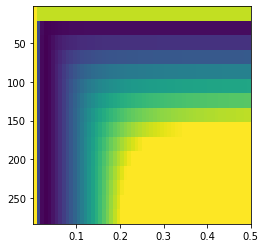

In [35]:
# define our parameters
krange = np.arange(3, 303, 20)
srange = np.linspace(.001, .5, 60)

# initialize some outout variables
sseMat = np.zeros((len(krange), len(srange)))   # summation square root error matrix
allkernels = [ [0]*len(srange) for i in range(len(krange))]
# double loop over the two parameters
for ki in range(len(krange)):
    for si in range(len(srange)):
        # create the gaussian
        x = np.arange(-krange[ki], krange[ki]+1)/srate
        gkern = np.exp( -x**2 / (2*srange[si]**2) )
        
        # filter the signal via convolutional
        filtsig = np.convolve(noisysignal, gkern/sum(gkern), mode = 'same')
        
        # compute the SSE
        sseMat[ki, si] = np.sum( (filtsig - signal)**2 )
        allkernels[ki][si] = gkern
        

# plotting
plt.imshow(sseMat,vmax = 400,
           extent=[srange[0], srange[-1], krange[-1], krange[0]])
plt.gca().set_aspect(1/plt.gca().get_data_ratio())
plt.show()

In [34]:
np.shape(allkernels)

(15, 60)

In [36]:
allkernels[4][2]

array([1.66070266e-18, 4.42728722e-18, 1.16633081e-17, 3.03629547e-17,
       7.81096240e-17, 1.98565272e-16, 4.98815885e-16, 1.23827039e-15,
       3.03758846e-15, 7.36343762e-15, 1.76388604e-14, 4.17540556e-14,
       9.76708666e-14, 2.25771776e-13, 5.15718237e-13, 1.16410877e-12,
       2.59664673e-12, 5.72361491e-12, 1.24671211e-11, 2.68349123e-11,
       5.70784822e-11, 1.19972825e-10, 2.49190559e-10, 5.11468059e-10,
       1.03739388e-09, 2.07925178e-09, 4.11821212e-09, 8.06025117e-09,
       1.55893020e-08, 2.97949732e-08, 5.62726750e-08, 1.05024435e-07,
       1.93696324e-07, 3.53012950e-07, 6.35767214e-07, 1.13147210e-06,
       1.98988422e-06, 3.45819912e-06, 5.93896022e-06, 1.00788056e-05,
       1.69023058e-05, 2.80105137e-05, 4.58706004e-05, 7.42311191e-05,
       1.18706862e-04, 1.87587490e-04, 2.92934250e-04, 4.52037710e-04,
       6.89314497e-04, 1.03871975e-03, 1.54674101e-03, 2.27601461e-03,
       3.30956352e-03, 4.75559246e-03, 6.75268934e-03, 9.47517291e-03,
      

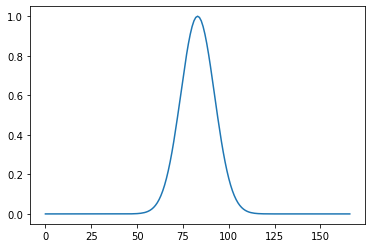

In [37]:
plt.plot(allkernels[4][2])

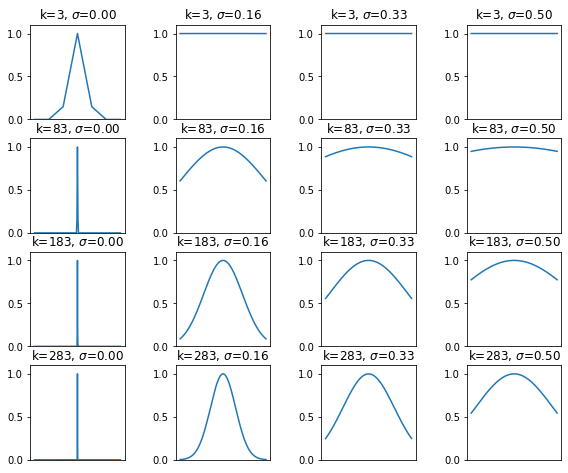

In [38]:
# plot a few non-randomly selected Gaussian kernels

fig,ax = plt.subplots(4,4,figsize=(10,8))

# 4 equally spaced points on the grid
sidx = np.linspace(0,len(srange)-1,4).astype(int)
kidx = np.linspace(0,len(krange)-1,4).astype(int)

for si in range(4):
  for kj in range(4):
    ax[kj,si].plot(allkernels[kidx[kj]][sidx[si]])
    ax[kj,si].set_xticks([])
    ax[kj,si].set_ylim([0,1.1])
    ax[kj,si].set_title('k=%g, $\sigma$=%.2f'%(krange[kidx[kj]],srange[sidx[si]]))
    ax[kj,si].set_aspect(1/ax[kj,si].get_data_ratio())

plt.show()